In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
    scalar.append('isBKG')
    scalar.append('polarization')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')
    
    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    cols.append('jet_phi')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [5]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [6]:
def getData(inputFiles, isMC=False):
    
    cols = []
    scalar = []  
    scalar.append('isBKG')
    scalar.append('polarization')

    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
        
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')

    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [8]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## get data and MC and apply cuts

In [9]:
df = applyCuts(getData(['data_calibrated.root']))
dfraw     = applyCuts(getData(['data_notcalibrated.root']))
mc = applyCuts(getData(['djangoh.root'],isMC=True))
altmc = applyCuts(getData(['rapgap.root'],isMC=True))


Processed data_calibrated.root in 0.6 seconds
abs(vertex_z)<25 and and vertex_z!=0 110989  fraction kept: 79.5
0.2 < y < 0.7 65545  fraction kept: 59.1
Q2>150 65545  fraction kept: 100.0
e_pt >15 21030  fraction kept: 32.1
isBKG 18260  fraction kept: 86.8

Processed data_notcalibrated.root in 0.2 seconds
abs(vertex_z)<25 and and vertex_z!=0 110989  fraction kept: 79.5
0.2 < y < 0.7 65545  fraction kept: 59.1
Q2>150 65545  fraction kept: 100.0
e_pt >15 21030  fraction kept: 32.1
isBKG 18260  fraction kept: 86.8

Processed djangoh.root in 1.7 seconds
abs(vertex_z)<25 and and vertex_z!=0 830140  fraction kept: 96.5
0.2 < y < 0.7 580675  fraction kept: 69.9
Q2>150 580675  fraction kept: 100.0
e_pt >15 224665  fraction kept: 38.7
isBKG 200142  fraction kept: 89.1

Processed rapgap.root in 1.8 seconds
abs(vertex_z)<25 and and vertex_z!=0 900001  fraction kept: 96.6
0.2 < y < 0.7 634712  fraction kept: 70.5
Q2>150 634712  fraction kept: 100.0
e_pt >15 253068  fraction kept: 39.9
isBKG 225630

In [10]:
mc.head()

,polarization,Q2,e_eta,Weight,njets,x_e,acoplanarity,e_theta,isBKG,e_pt,...,e_phi,Q2_e,WeightGen,y,x,y_e,Empz,ptratio,logQ2,logx
0,0.0,308.923553,-0.988544,1.000000,2.0,0.011356,175.606247,2.429109,0.0,15.039418,...,2.522718,308.923553,1.000000,0.269797,0.011273,0.267832,55.436275,0.854048,2.489851,-1.947944
11,0.0,314.569122,-1.002234,1.945175,1.0,0.013249,177.782181,2.438012,0.0,15.525362,...,0.151090,314.569122,1.945175,0.217115,0.014265,0.233756,53.594379,0.808806,2.497716,-1.845731
12,0.0,1342.502075,-0.250676,1.000000,2.0,0.048487,169.953552,1.818888,0.0,31.249514,...,1.113435,1342.502075,1.000000,0.275274,0.048017,0.272603,55.529240,1.024087,3.127915,-1.318607
15,0.0,470.132843,-0.745620,1.000000,1.0,0.014716,178.867584,2.255610,0.0,17.951477,...,-2.805650,470.132843,1.000000,0.289383,0.015995,0.314544,52.361351,0.771342,2.672221,-1.796009
16,0.0,459.198792,-0.745500,1.000000,1.0,0.013674,176.235306,2.255517,0.0,17.531864,...,-0.545849,459.198792,1.000000,0.332883,0.013582,0.330647,55.644417,1.158926,2.662001,-1.867048


## plot electron variables (data and MC)

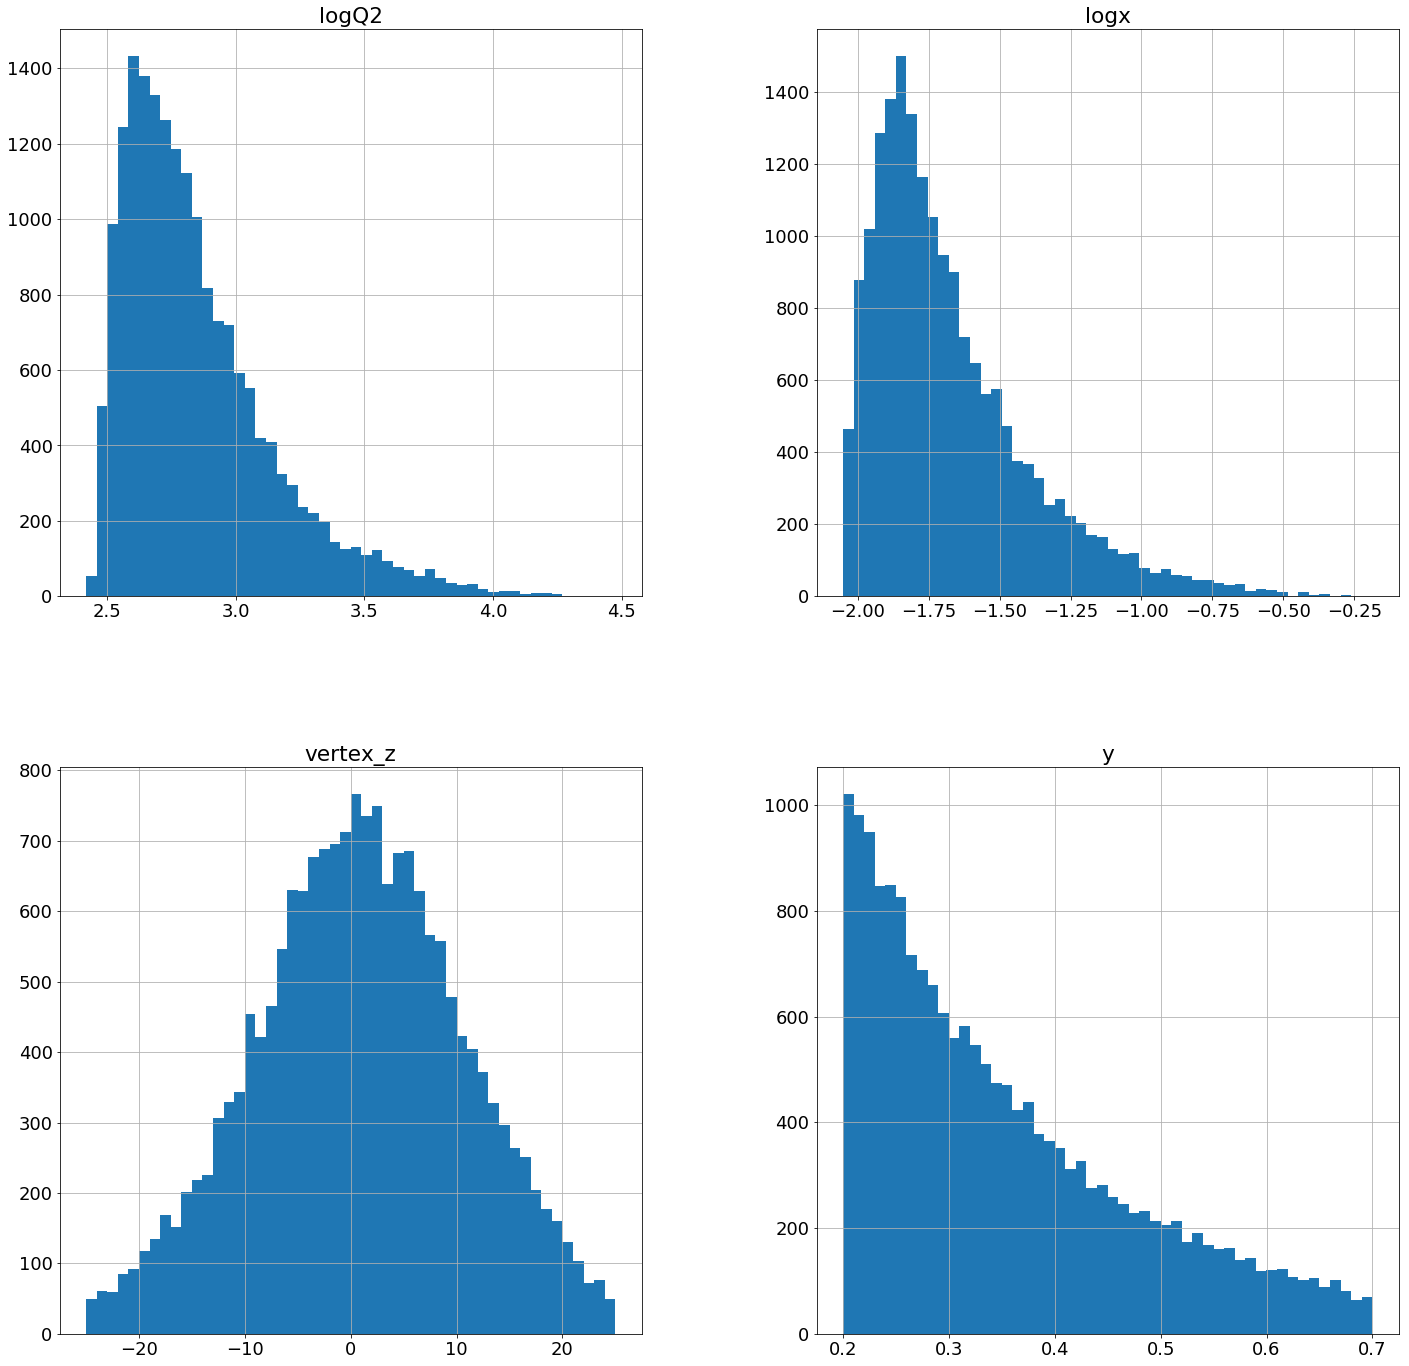

In [11]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

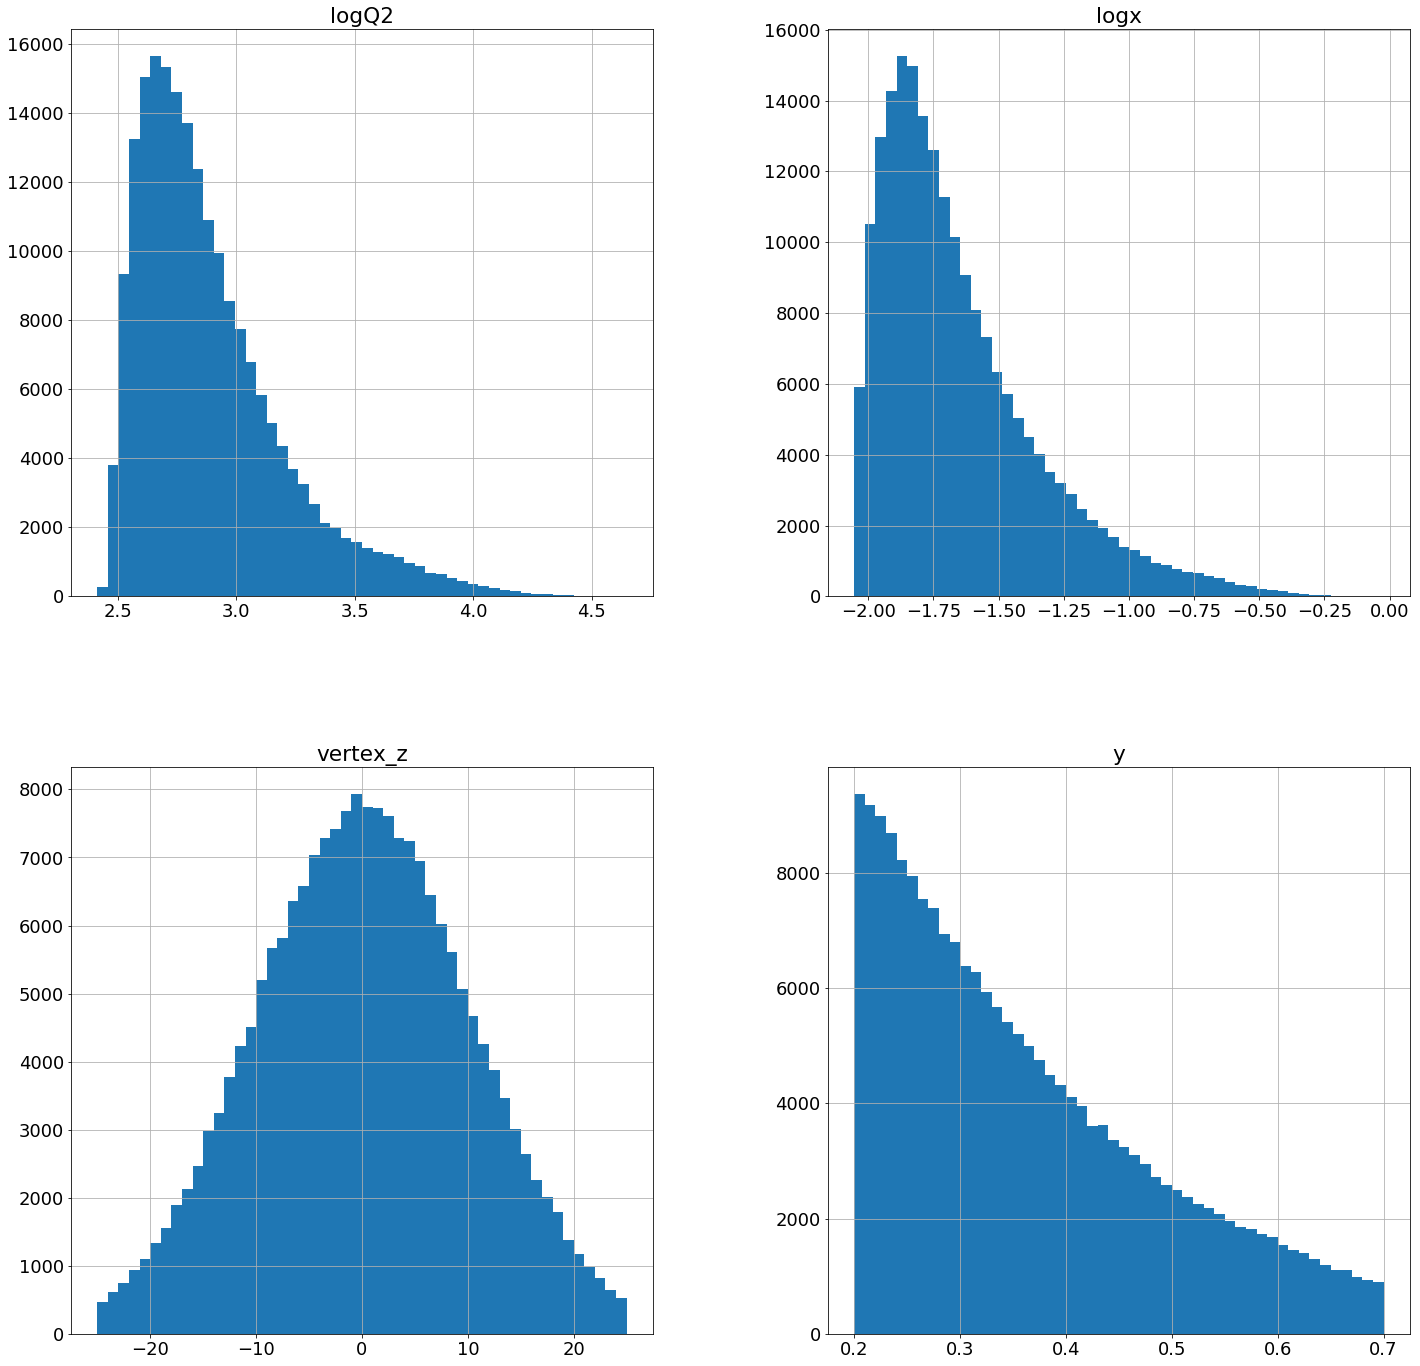

In [13]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

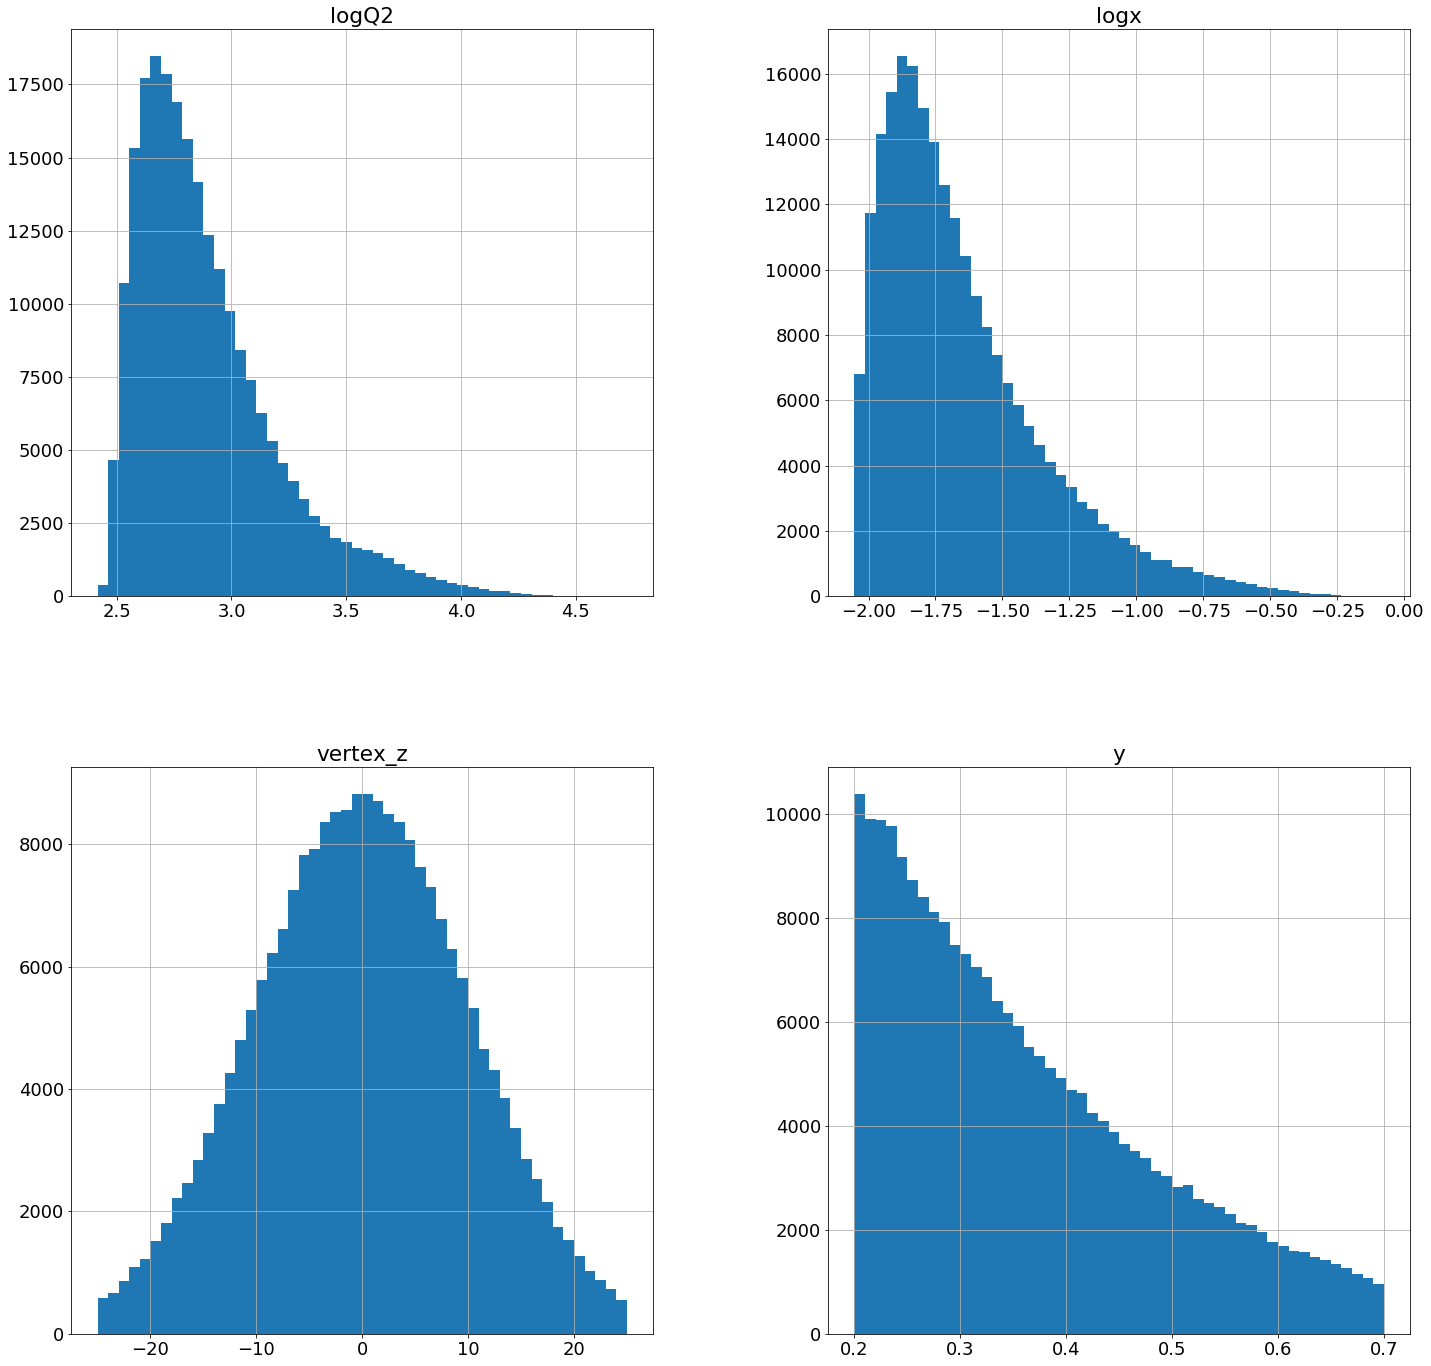

In [12]:
rc('text', usetex=False)
altmc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

## Get jet data and apply selection

In [14]:
df_jet      = applyCutsJets(getJetData(['data_calibrated.root']))
dfraw_jet      = applyCutsJets(getJetData(['data_notcalibrated.root']))
mc_jet = applyCutsJets(getJetData(['djangoh.root'],isMC=True))
altmc_jet = applyCutsJets(getJetData(['rapgap.root'],isMC=True))


Processed data_calibrated.root in 3.8 seconds
abs(vertex_z)<25 and and vertex_z!=0 113098  fraction kept: 90.2
0.2 < y < 0.7 67526  fraction kept: 59.7
Q2>150 67526  fraction kept: 100.0
e_pt >15 24135  fraction kept: 35.7
jet_pt>10 21817  fraction kept: 90.4
isBKG 19035  fraction kept: 87.2

Processed data_notcalibrated.root in 4.0 seconds
abs(vertex_z)<25 and and vertex_z!=0 109453  fraction kept: 90.7
0.2 < y < 0.7 64896  fraction kept: 59.3
Q2>150 64896  fraction kept: 100.0
e_pt >15 23691  fraction kept: 36.5
jet_pt>10 21242  fraction kept: 89.7
isBKG 18530  fraction kept: 87.2

Processed djangoh.root in 38.8 seconds
abs(vertex_z)<25 and and vertex_z!=0 920853  fraction kept: 96.6
0.2 < y < 0.7 650115  fraction kept: 70.6
Q2>150 650115  fraction kept: 100.0
e_pt >15 271425  fraction kept: 41.8
jet_pt>10 239917  fraction kept: 88.4
isBKG 214401  fraction kept: 89.4

Processed rapgap.root in 42.0 seconds
abs(vertex_z)<25 and and vertex_z!=0 958520  fraction kept: 96.7
0.2 < y < 0.7

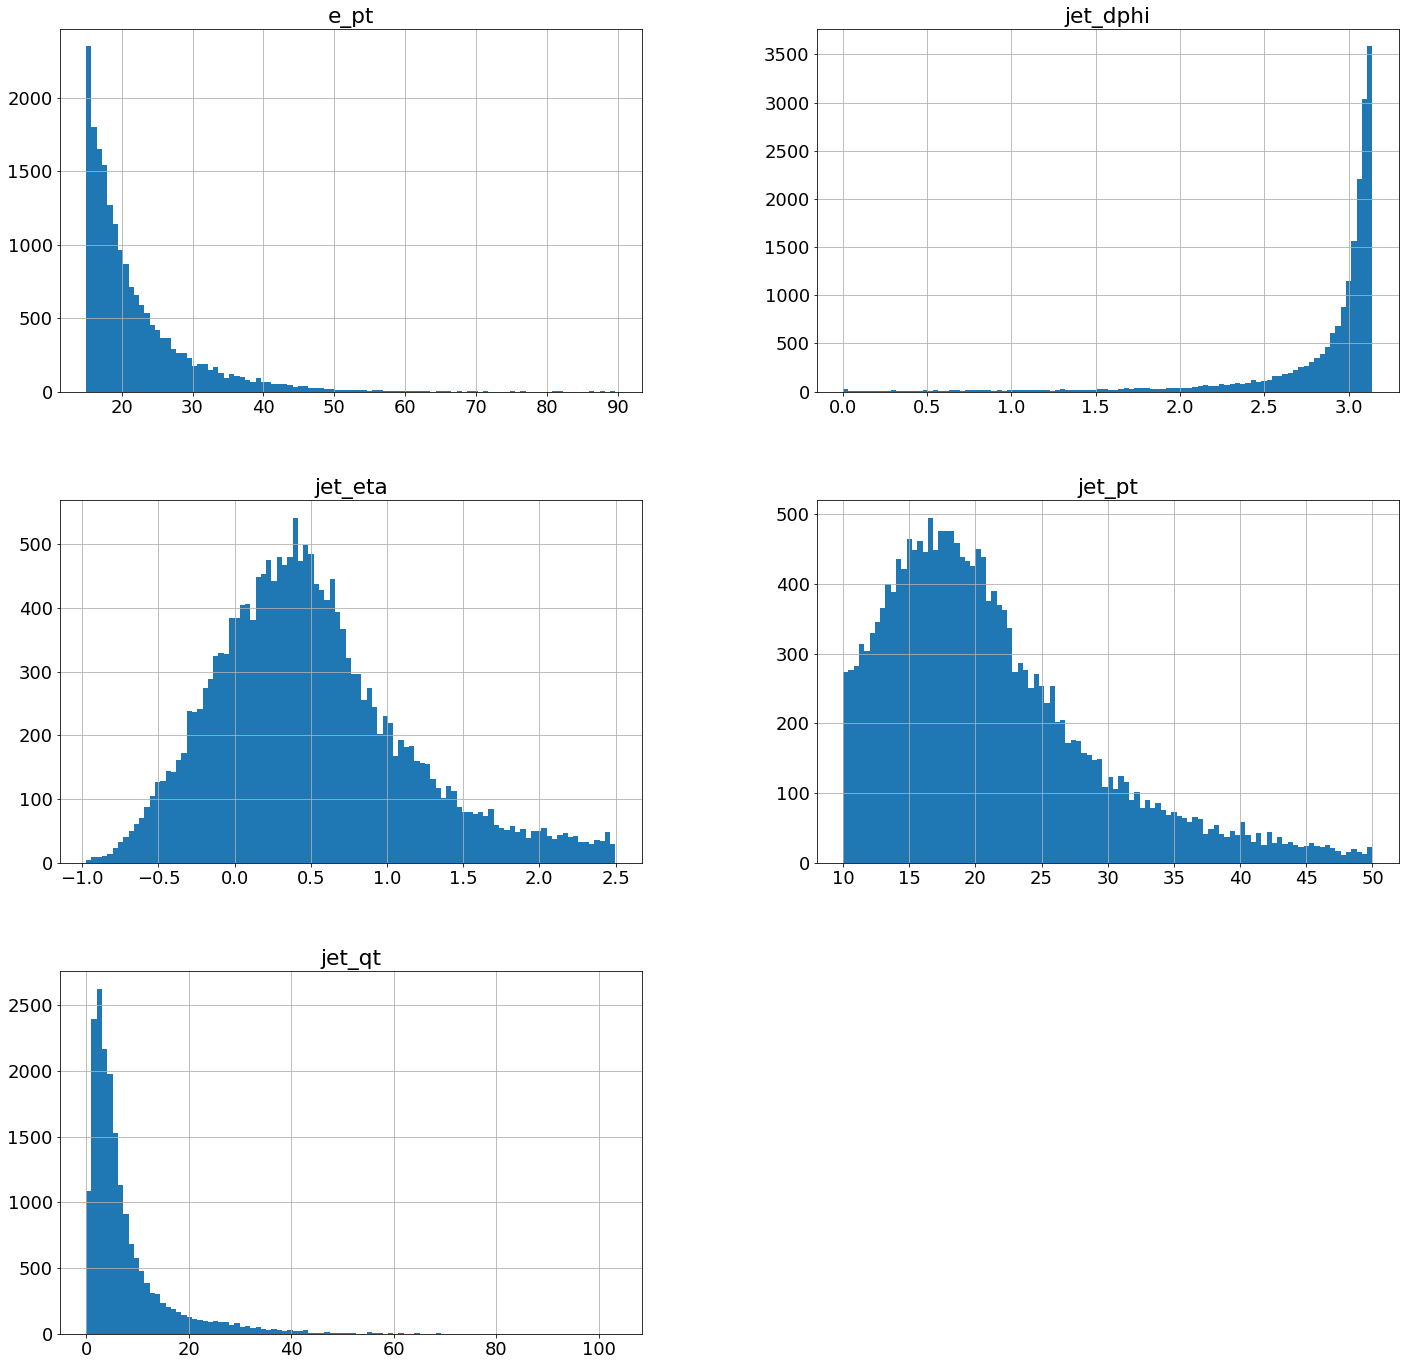

In [15]:
rc('text', usetex=False)
df_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()


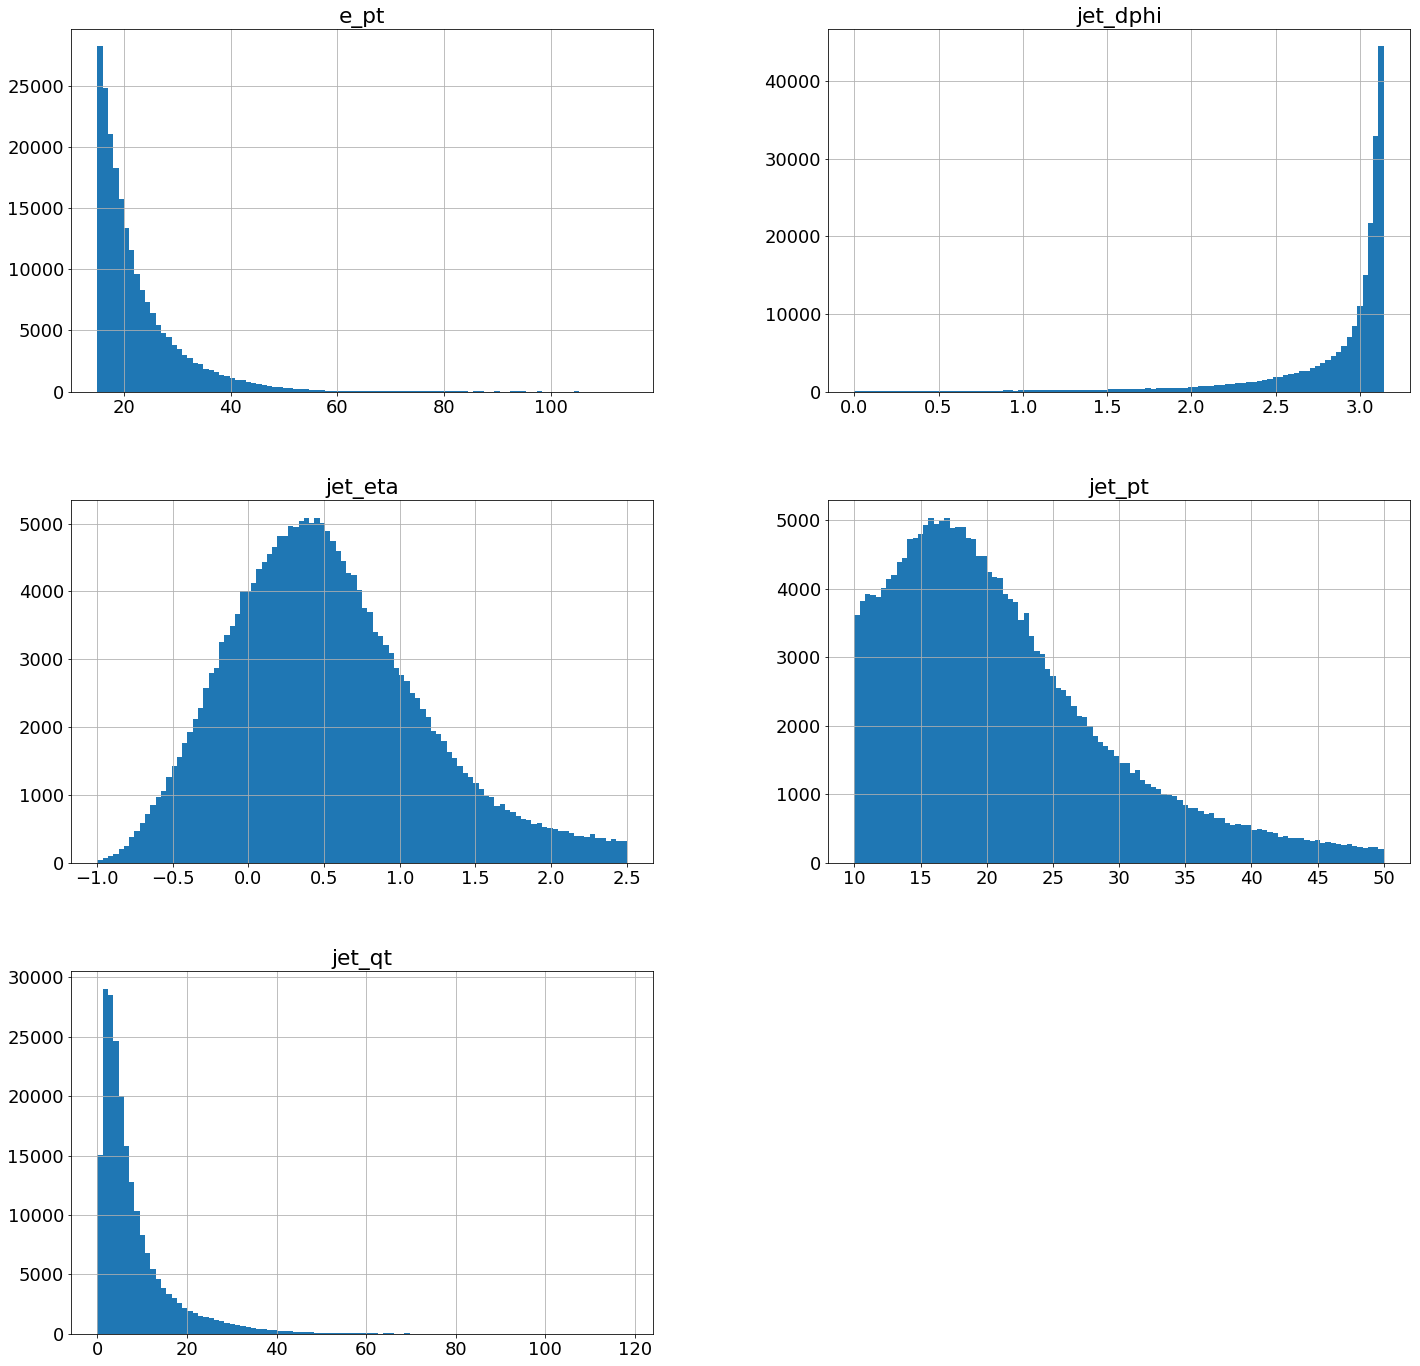

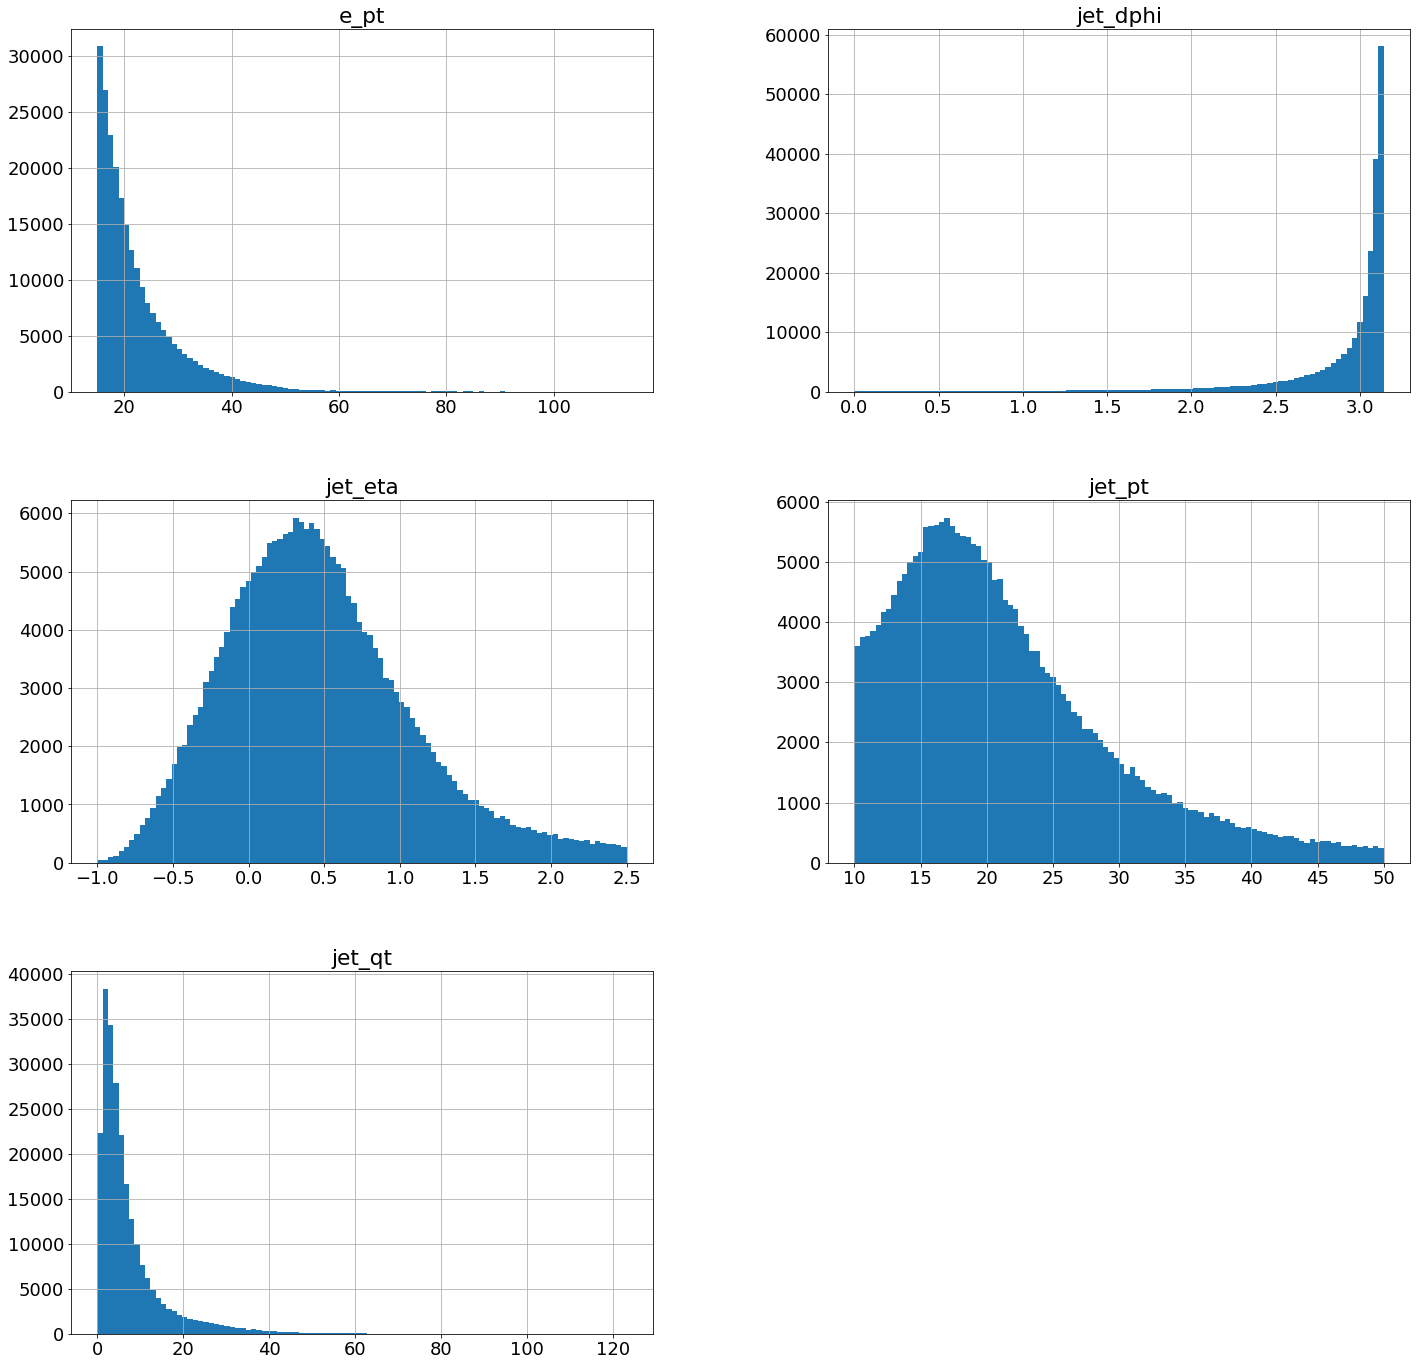

In [16]:
mc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()
altmc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()

## Peek into data format

In [17]:
df_jet.head()

,x_e,njets,ptmiss,Q2,ptratio,jet_p,jet_eta,acoplanarity,jet_z,polarization,...,e_p,e_eta,jet_pt,jet_phi,y,x,Empz,__array_index,jet_qtnormjetpt,jet_qtnormept
14,0.012774,1.0,1.722699,341.601257,0.895417,19.649332,0.385650,178.229523,0.857346,16.080000,...,23.427338,-0.941359,18.273535,0.690724,0.258633,0.013004,54.669891,0,0.145520,0.167625
15,0.023945,1.0,1.832120,1035.069092,1.074758,26.930309,0.103272,179.582428,1.030093,16.080000,...,25.229013,-0.262635,26.787338,-1.046129,0.429481,0.023728,56.872459,0,0.089890,0.098753
20,0.013752,1.0,3.566952,441.353394,1.208110,23.372107,0.270065,178.197128,0.988920,16.959999,...,22.876740,-0.776157,22.544941,2.813890,0.315783,0.013761,55.398811,0,0.246188,0.319439
24,0.014465,1.0,1.823699,545.332092,1.043469,17.405682,0.388331,175.041824,0.536311,16.080000,...,22.295158,-0.628314,16.170986,-1.742621,0.354465,0.015147,52.226082,0,0.205960,0.179856
27,0.010334,1.0,2.651287,455.770294,0.835164,14.120414,-0.378392,179.405533,0.803265,16.959999,...,19.743273,-0.665174,13.166517,-2.190114,0.422065,0.010632,51.543446,0,0.220353,0.180676


In [18]:
mc_jet.head()

,x_e,njets,ptmiss,Q2,ptratio,genjet_p,jet_p,jet_eta,genjet_z,acoplanarity,...,jet_dphi,Weight,jet_pt,jet_phi,y,x,Empz,__array_index,jet_qtnormjetpt,jet_qtnormept
0,0.011356,2.0,2.440001,308.923553,0.854048,22.613100,21.321825,0.446179,0.776283,175.606247,...,2.883554,1.000000,19.362352,-0.876913,0.269797,0.011273,55.436275,0,0.318244,0.409720
9,0.013249,1.0,3.017151,314.569122,0.808806,14.361694,13.254869,0.168182,0.924958,177.782181,...,3.054475,1.945175,13.069595,-3.077621,0.217115,0.014265,53.594379,0,0.210514,0.177215
10,0.048487,2.0,5.588820,1342.502075,1.024087,89.671570,107.882935,1.973736,0.226412,169.953552,...,2.423441,1.000000,29.410116,-2.746309,0.275274,0.048017,55.529240,0,0.727157,0.684356
11,0.048487,2.0,5.588820,1342.502075,1.024087,17.411993,17.361059,0.434709,0.642255,169.953552,...,2.526541,1.000000,15.840624,-1.413105,0.275274,0.048017,55.529240,1,1.292002,0.654926
13,0.014716,1.0,4.363582,470.132843,0.771342,18.332420,14.405755,0.109578,0.929709,178.867584,...,3.102563,1.000000,14.319698,0.296913,0.289383,0.015995,52.361351,0,0.257358,0.205292


## pT spectrum

Cross section [   0.            0.          766.91801431 2258.92291266 1351.88720886
  774.51898379  442.19830599  253.68714855  142.95526859   80.80112308
   44.08646579]
Cross section [ 716.59792683  846.07287917 1081.45387689 1158.51644307 1117.49881464
  830.40895778  550.37330924  319.55919342  180.9585287   101.38414601
   53.78548826]


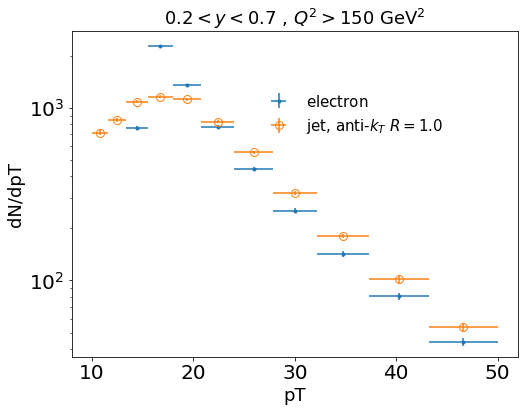

In [19]:
import seaborn as sns
nbins = 12
minpt = 10
maxpt = max(df_jet['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df.query('e_pt>5')['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


y, x  = np.histogram(df_jet.query('jet_pt>5')['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2

yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 
plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label='$\mathrm{jet}$, $\mathrm{anti}$-$k_{T}$ $R=1.0$')

plt.yscale('log')
ax1.set_xlabel('pT' ,fontsize=18)
ax1.set_ylabel('dN/dpT', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 150\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

## DATA/MC comparisons

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


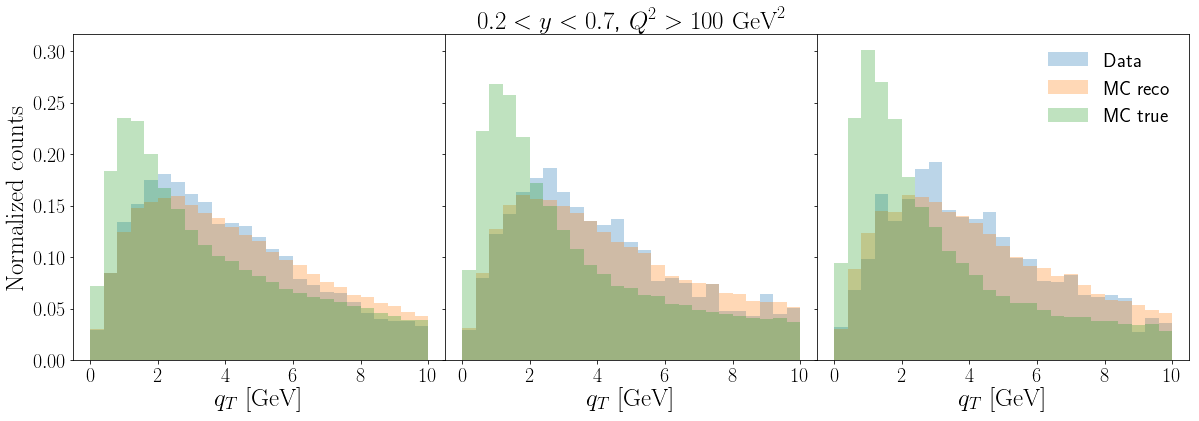

In [20]:
from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    #plot data
    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC reco')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=25,range=(0,10.0),normed=True,alpha=0.3, label='MC true')
    
    
    axs[counter].xaxis.set_label_text(r'$q_{T}$  $\mathrm{[GeV]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')

17.12538  mean lepton pt
0.3516999  mean inelasticity
22.959606  mean jet p
17.503937  mean jet pT
count    10466.000000
mean        17.503937
std          4.750584
min         10.002090
25%         14.109514
50%         16.917970
75%         20.093929
max         49.866707
Name: jet_pt, dtype: float64
0.014075787  mean x
481.3283  mean Q2
count    10466.000000
mean       481.328308
std        143.901215
min        262.383331
25%        379.666077
50%        450.184845
75%        543.281403
max       1385.642700
Name: Q2, dtype: float64
###########


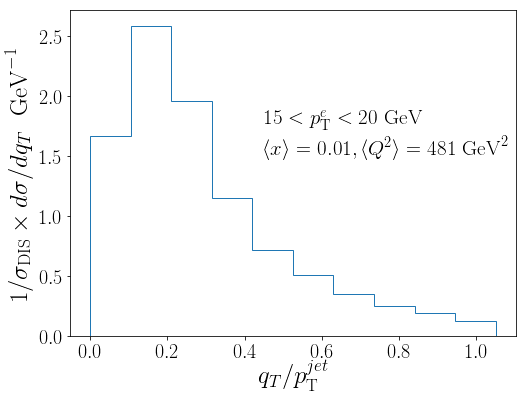

In [21]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut['jet_qtnormjetpt'],bins=10,range=(0,1.05),normed=True,histtype='step')    
plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

plt.text(0.45,1.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

17.12538  mean lepton pt
0.3516999  mean inelasticity
22.959606  mean jet p
17.503937  mean jet pT
count    10466.000000
mean        17.503937
std          4.750584
min         10.002090
25%         14.109514
50%         16.917970
75%         20.093929
max         49.866707
Name: jet_pt, dtype: float64
0.014075787  mean x
481.3283  mean Q2
count    10466.000000
mean       481.328308
std        143.901215
min        262.383331
25%        379.666077
50%        450.184845
75%        543.281403
max       1385.642700
Name: Q2, dtype: float64
###########
8688
17.194744  mean lepton pt
0.36766717  mean inelasticity
22.880215  mean jet p
17.311972  mean jet pT
count    108751.000000
mean         17.311972
std           4.893677
min          10.001206
25%          13.712574
50%          16.632612
75%          19.970930
max          49.896599
Name: jet_pt, dtype: float64
0.013900331  mean x
497.6691  mean Q2
count    108751.000000
mean        497.669098
std         148.349152
min         259.698

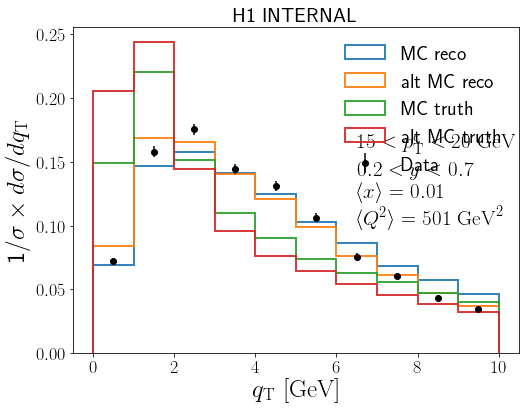

In [22]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = np.sum(y)
print integral 
y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, fmt='o',ls='none',label='Data',color='black')

#plot MC
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='alt MC reco',histtype='step',lw=2)
printSummary(df_cut)


df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC truth',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='alt MC truth',histtype='step',lw=2)
printSummary(df_cut)



plt.xlabel(r'$q_{\mathrm{T}} $ $\mathrm{[GeV]}$', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


plt.text(6.5,0.10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()) + '$\n$'+ r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()), fontsize=21)


#plt.text(6.5,0.10, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, r'$\mathrm{H1}$ $\mathrm{INTERNAL}$', fontsize=28)

#plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('H1 INTERNAL', fontsize=21)
plt.savefig('H1_qtplot.png', bbox_inches='tight')
plt.savefig('H1_qtplot.pdf', bbox_inches='tight')

17.12538  mean lepton pt
0.3516999  mean inelasticity
22.959606  mean jet p
17.503937  mean jet pT
count    10466.000000
mean        17.503937
std          4.750584
min         10.002090
25%         14.109514
50%         16.917970
75%         20.093929
max         49.866707
Name: jet_pt, dtype: float64
0.014075787  mean x
481.3283  mean Q2
count    10466.000000
mean       481.328308
std        143.901215
min        262.383331
25%        379.666077
50%        450.184845
75%        543.281403
max       1385.642700
Name: Q2, dtype: float64
###########
9290.0
[1576 2541 1968 1239  739  568  403  256]
[39.69886648 50.40833264 44.36214603 35.19943181 27.18455444 23.83275058
 20.0748599  16.        ]
[0.16964478 0.27351991 0.21184069 0.13336921 0.0795479  0.06114101
 0.04337998 0.02755651]


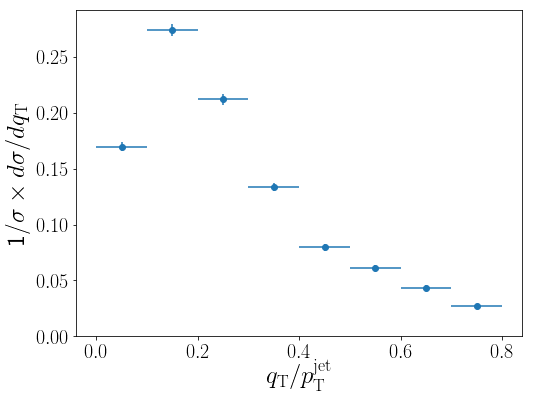

In [26]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print '###########'
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=8,range=(0,0.80))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
print integral 
print y 
print erry
#y = y/width
y = y/integral
print y 
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

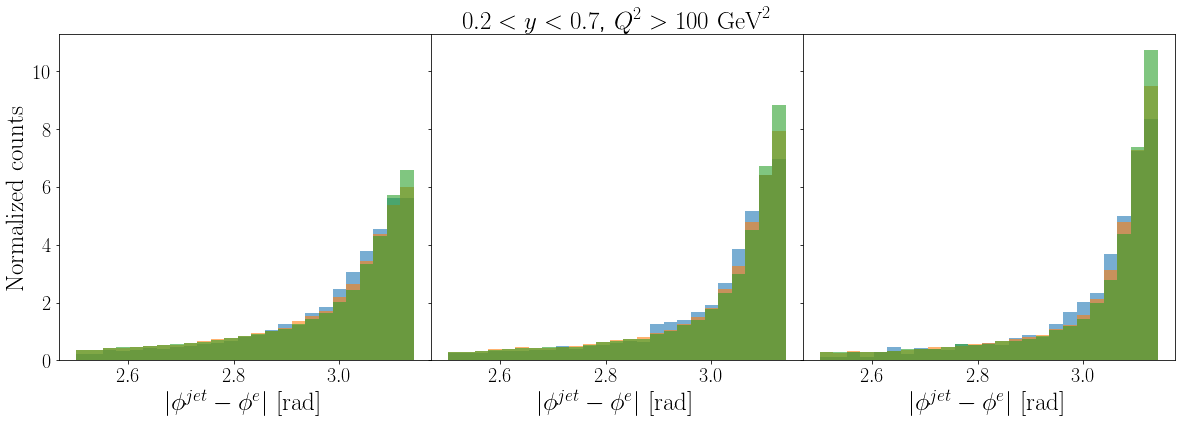

In [23]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,25),(25,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=25,range=(2.5,3.1415),normed=True,alpha=0.6)
    
    axs[counter].xaxis.set_label_text(r'$|\phi^{jet}-\phi^e|$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    #axs[counter].text(0.07,11, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetAzimuthal.pdf', bbox_inches='tight')

## Event variable

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 <a list of 9 Text xticklabel objects>)

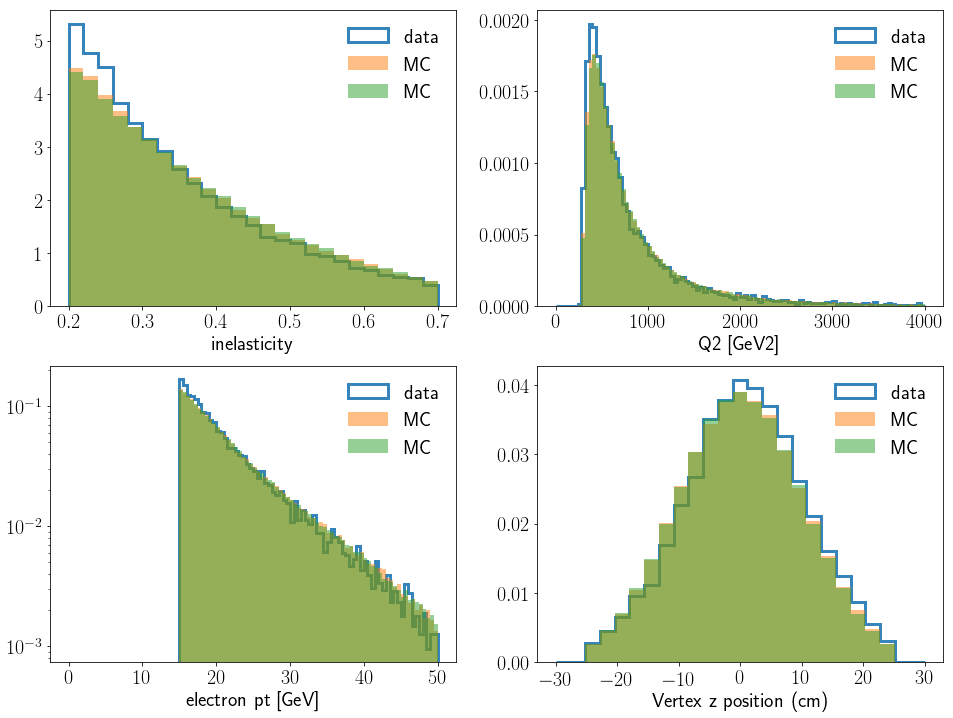

In [24]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y'],bins=25,normed=True,range=(0.2,0.7),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y'],bins=25,normed=True,range=(0.2,0.70),alpha=0.5,label='MC')
plt.hist(altmc_jet['y'],bins=25,normed=True,range=(0.2,0.70),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['Q2'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.xlabel('Q2 [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['e_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.xlabel('electron pt [GeV]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')
plt.hist(altmc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

(array([-40., -20.,   0.,  20.,  40.]), <a list of 5 Text xticklabel objects>)

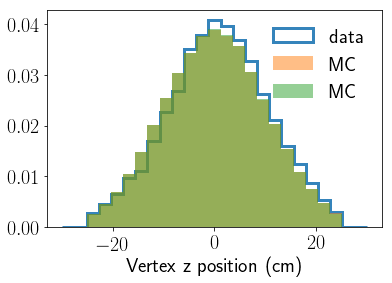

In [39]:
plt.hist(df_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC',weights=mc_jet['WeightGen'])
plt.hist(mc_jet['vertex_z'],bins=25,normed=True,range=(-30,30),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

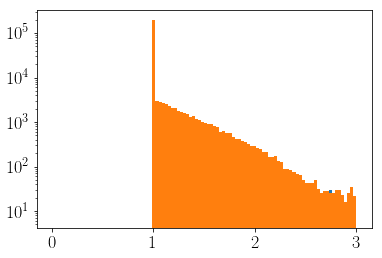

1.0634909


In [41]:
#plt.hist(mc_jet['Weight'],bins=100,range=(0,3))
plt.hist(mc_jet['WeightGen'],bins=100,range=(0,3))
plt.hist(altmc_jet['WeightGen'],bins=100,range=(0,3))

plt.yscale('log')
plt.show()
print mc_jet['WeightGen'].mean()

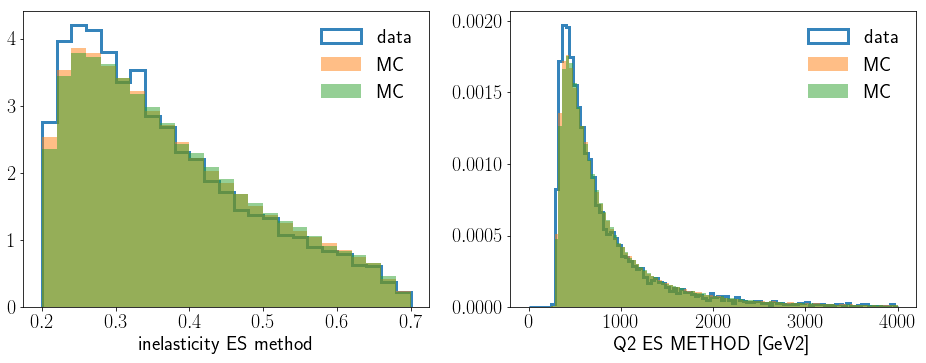

In [28]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y_e'],bins=25,normed=True,range=(0.2,0.7),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y_e'],bins=25,normed=True,range=(0.2,0.7),alpha=0.5,label='MC')
plt.hist(altmc_jet['y_e'],bins=25,normed=True,range=(0.2,0.7),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity ES method',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(222)
plt.hist(df_jet['Q2_e'],bins=100,normed=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2_e'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['Q2_e'],bins=100,normed=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.xlabel('Q2 ES METHOD [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


In [ ]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('jet pseudorapidity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.5,label='MC')
plt.xlabel('jet phi ')
#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.5,label='MC')
plt.xlabel('jet z ')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(dfraw_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)

plt.hist(mc_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.5,label='MC')
plt.xlabel('jet pt ')

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 7 Text xticklabel objects>)

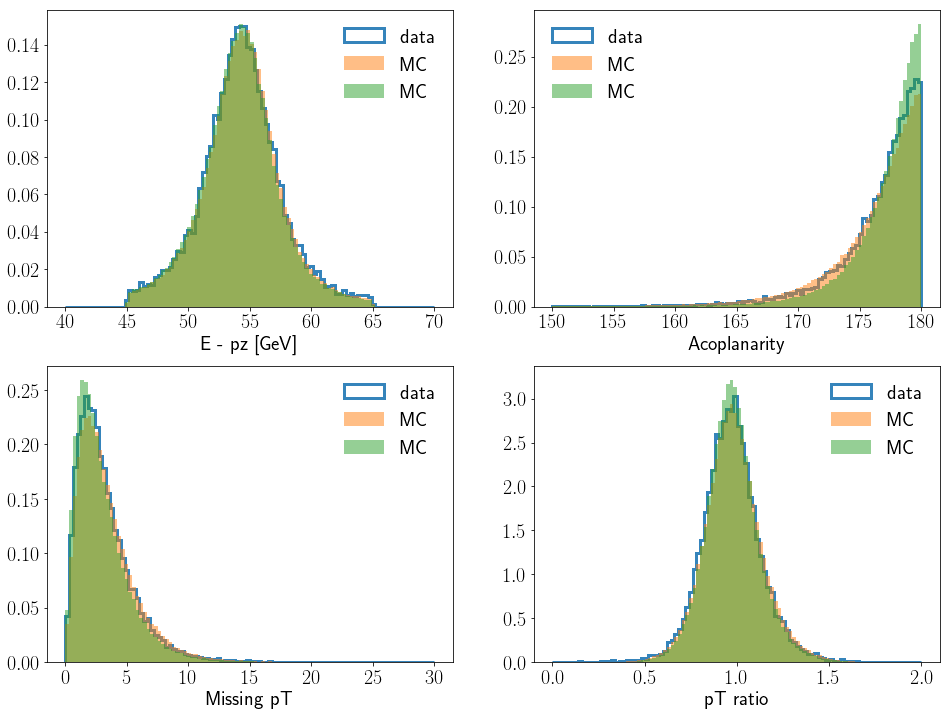

In [29]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df['Empz'],bins=100,normed=True,range=(40,70.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['Empz'],bins=100,normed=True,range=(40,70.0),alpha=0.5,label='MC')
plt.hist(altmc['Empz'],bins=100,normed=True,range=(40.0,70.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('E - pz [GeV]',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(222)
plt.hist(df['acoplanarity'],bins=100,normed=True,range=(150,180.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['acoplanarity'],bins=100,normed=True,range=(150,180.0),alpha=0.5,label='MC',weights=mc['WeightGen'])
plt.hist(altmc['acoplanarity'],bins=100,normed=True,range=(150,180.0),alpha=0.5,label='MC',weights=altmc['WeightGen'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Acoplanarity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(223)
plt.hist(df['ptmiss'],bins=100,normed=True,range=(0.0,30.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['ptmiss'],bins=100,normed=True,range=(0.0,30.0),alpha=0.5,label='MC')
plt.hist(altmc['ptmiss'],bins=100,normed=True,range=(0.0,30.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Missing pT',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(224)
plt.hist(df['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.9,label='data',histtype='step',linewidth=3)
#plt.hist(dfraw['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.5,label='MC')
plt.hist(altmc['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('pT ratio',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text xticklabel objects>)

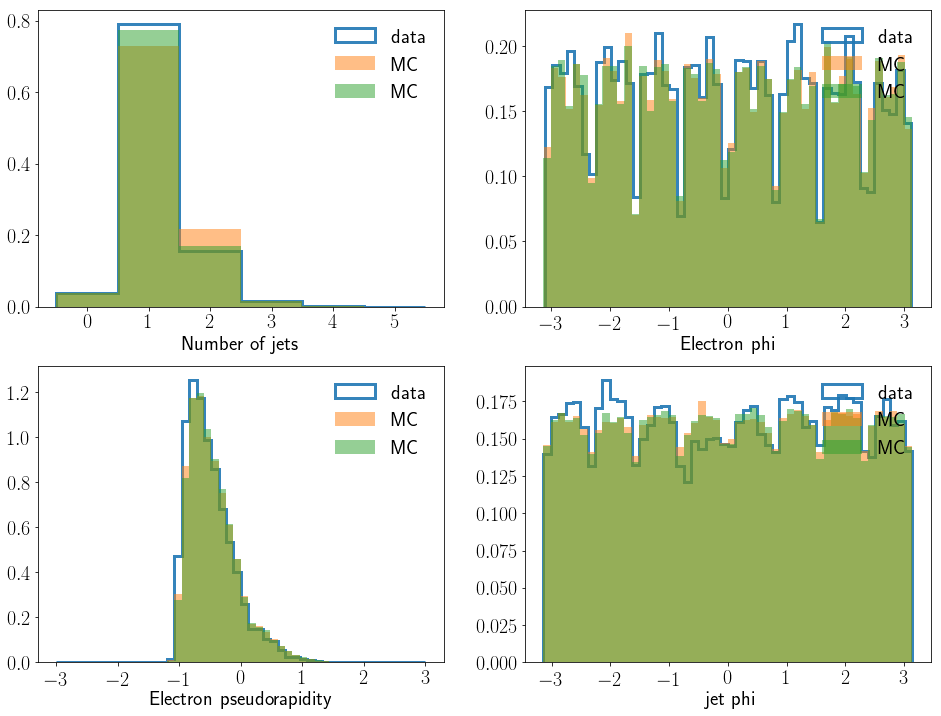

In [30]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df['njets'],bins=6,range=(-0.5,5.5), normed=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['njets'],bins=6,range=(-0.5,5.5),normed=True,alpha=0.5,label='MC')
plt.hist(altmc['njets'],bins=6,range=(-0.5,5.5),normed=True,alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Number of jets',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(222)
plt.hist(df['e_phi'],bins=50,normed=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['e_phi'],bins=50,normed=True,alpha=0.5,label='MC')
plt.hist(altmc['e_phi'],bins=50,normed=True,alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Electron phi',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(223)
plt.hist(df['e_eta'],bins=50,range=(-3.0,3.0),normed=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['e_eta'],bins=50,range=(-3.0,3.0),normed=True,alpha=0.5,label='MC')
plt.hist(altmc['e_eta'],bins=50,range=(-3.0,3.0),normed=True,alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Electron pseudorapidity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(224)
plt.hist(df_jet['jet_phi'],bins=50,normed=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_phi'],bins=50,normed=True,alpha=0.5,label='MC')
plt.hist(altmc_jet['jet_phi'],bins=50,normed=True,alpha=0.5,label='MC')

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('jet phi',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


## Azimuthal separation between lepton and jet. Normalize the distribution by the number of electrons, i.e. by the inclusive DIS cross section

###########
10134
101844
101844


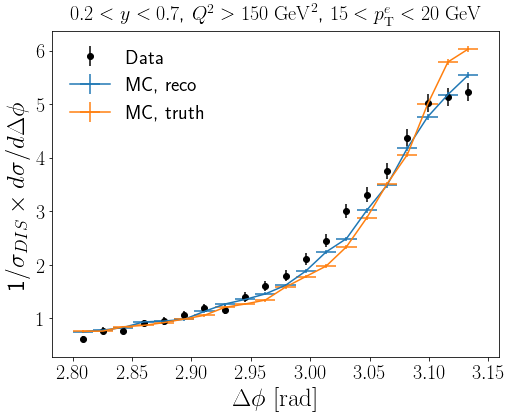

In [58]:
rc('text', usetex=True)
fig = plt.figure(figsize=(8,6))
cut = 'e_pt > %2.2f and e_pt<%2.2f'%(15,20)

df_cut = df_jet.query(cut)


#printSummary(df_cut)
print '###########'

mindphi = 2.8
nbins = 20#40

##Plot data
Nelectrons = df.query(cut).shape[0]
print Nelectrons
y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y) 
y = y/width
erry = erry/width
y = np.true_divide(y, Nelectrons)
erry = np.true_divide(erry,Nelectrons)

plt.errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')




    
#Plot MC at the reconstructed level
mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
Nelectrons = mc.query(cut).shape[0]
print Nelectrons
#printSummary(df_cut)
y, x  = np.histogram(mc_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
y = y/width
erry = erry/width
y = np.true_divide(y, Nelectrons)
erry = np.true_divide(erry,Nelectrons)
plt.errorbar(x,y ,xerr=width/2.0,yerr=erry,  fmt='-',label='MC, reco')

#Plot MC at the generated level

mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
Nelectrons = mc.query(cut).shape[0]
print Nelectrons
#printSummary(df_cut)
y, x  = np.histogram(mc_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
y = y/width
erry = erry/width
y = np.true_divide(y, Nelectrons)
erry = np.true_divide(erry,Nelectrons)
plt.errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')



plt.xlabel(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
plt.ylabel(r'1/\sigma_{DIS} \times d\sigma/d\Delta\phi}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
 #                   r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.title('$0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$, $15<p_{\mathrm{T}}^{e}<20$ $\mathrm{GeV}$',fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_deltaphi.png', bbox_inches='tight')
plt.savefig('H1_deltaphi.pdf', bbox_inches='tight')
#plt.yscale('log')
plt.savefig('H1_deltaphi_log.png', bbox_inches='tight')
plt.savefig('H1_deltaphi_log.pdf', bbox_inches='tight')

## Azimuthal separation between lepton and jet for various electron pT ranges/'

###########
101844
y
[0.53036764 0.65517649 0.87356866 0.68635813 0.82157052 0.76955305
 1.00876381 0.89434544 0.94636604 1.02956306 1.21672577 1.11276007
 1.09193338 1.22715597 1.27912196 1.37275075 1.6639403  1.54950547
 1.79913545 1.76789214 1.94473022 2.44385091 2.55830821 2.52710933
 3.01581601 3.30708134 3.42139127 3.72306642 3.81656716 4.38864253
 4.82542686 4.92929927 5.14781529 5.16848468 5.15821492 5.16848468]
mcy
[0.7481533  0.76058989 0.73678912 0.82783214 0.82992257 0.87957165
 0.92823011 0.91889367 0.96962276 0.96858794 0.97684192 1.12277555
 1.18173038 1.27799798 1.28003545 1.38354923 1.46116044 1.4538802
 1.55636353 1.73534312 1.89267879 1.96196217 2.22795923 2.37697276
 2.49901827 2.85816228 3.11471843 3.36315257 3.67143554 4.10925503
 4.49317183 4.7186432  5.03955477 5.19361189 5.44313308 5.61891065]
[-0.29109763 -0.13859427  0.18564272 -0.17089698 -0.01006365 -0.12508202
  0.08676049 -0.02671499 -0.02398532  0.06295259  0.24557079 -0.00892028
 -0.07598772 -0.03978254

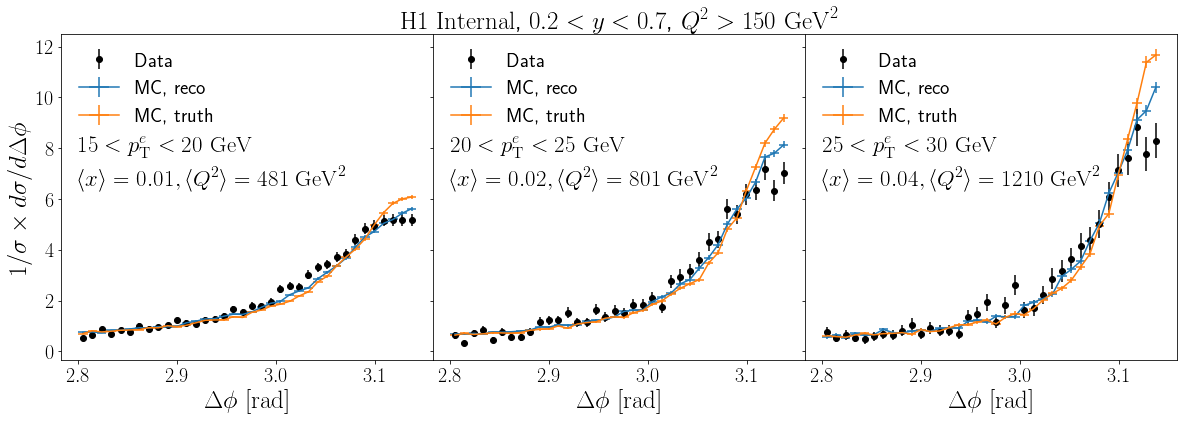

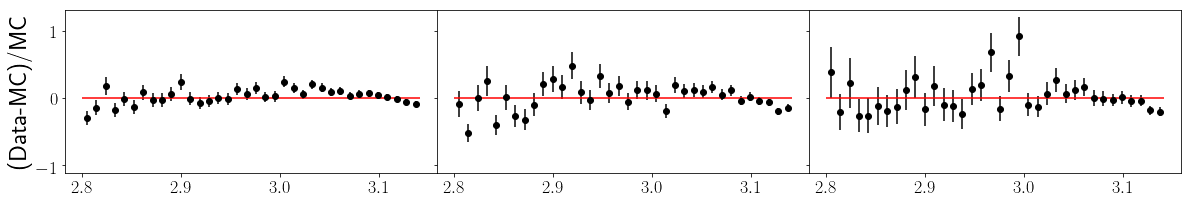

In [86]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})
fig2, axs2 = plt.subplots(1, 3,sharey=True, figsize=(20,3), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    cut = 'e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1])
    df_cut = df_jet.query(cut)
    #printSummary(df_cut)
    print '###########'
    
    ##Plot data
    Nelectrons = df.query(cut).shape[0]
    y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    #Plot MC at the reconstructed level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    print Nelectrons
    #printSummary(df_cut)
    mcy, x  = np.histogram(mc_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    errmcy = np.sqrt(mcy)
    mcy = mcy/width
    errmcy = errmcy/width
    mcy = np.true_divide(mcy, Nelectrons)
    errmcy = np.true_divide(errmcy,Nelectrons)
    axs[counter].errorbar(x,mcy ,xerr=width/2.0,yerr=errmcy,  fmt='-',label='MC, reco')


    print 'y'
    print y 
    print 'mcy'
    print mcy
    ratio = np.divide(y-mcy, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    error_ratio = np.divide(erry, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    print ratio
    
    axs2[counter].errorbar(x,ratio,yerr=error_ratio,color='black',ls='none',fmt='o')
    axs2[counter].hlines(0.0, minimo, np.pi,color='red')
    axs2[0].yaxis.set_label_text('(Data-MC)/MC ', fontsize=25)
    axs2[counter].yaxis.set_data_interval(-1.0,1.0)

    
    #Plot MC at the generated level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    print Nelectrons
    #printSummary(df_cut)
    y, x  = np.histogram(mc_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    axs[counter].errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')

    

    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(minimo,6.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

#np.divide(self.data- fitTotal , totalerror,  out=np.zeros_like(totalerror), where=totalerror!=0)

## qT/jetpT

###########
101844
y
[0.4866785  1.50621669 2.11367657 2.47602146 2.68205983 2.50444065
 2.4085259  2.19182962 2.0426289  1.92539873 1.60923719 1.53463515
 1.1865016  0.96625176 0.9307288  0.78507955 0.7211372  0.57193578
 0.69982205 0.53285943 0.48312692 0.49378307 0.44760192 0.35168722
 0.38365961 0.2770869  0.24866773 0.26998211 0.23090575 0.23090625
 0.20248658 0.22380096 0.16341022 0.16341057 0.13143866 0.14209585]
mcy
[0.51891127 1.40438316 1.98020487 2.2219867  2.28808719 2.2530931
 2.14916945 2.06963604 1.90844833 1.72216249 1.55850217 1.442912
 1.29551155 1.18239604 1.02757219 0.97808366 0.89536992 0.80664507
 0.72251645 0.65535494 0.59950613 0.56415668 0.50052998 0.47119101
 0.42099752 0.39130416 0.37044875 0.33227273 0.30858946 0.28632073
 0.25238588 0.23895358 0.24284188 0.21102898 0.20855416 0.19971712]
[-0.06211615  0.07251121  0.06740298  0.11432776  0.17218428  0.11155666
  0.12067753  0.0590411   0.07030872  0.11801223  0.03255371  0.06356808
 -0.08414433 -0.18280193 -

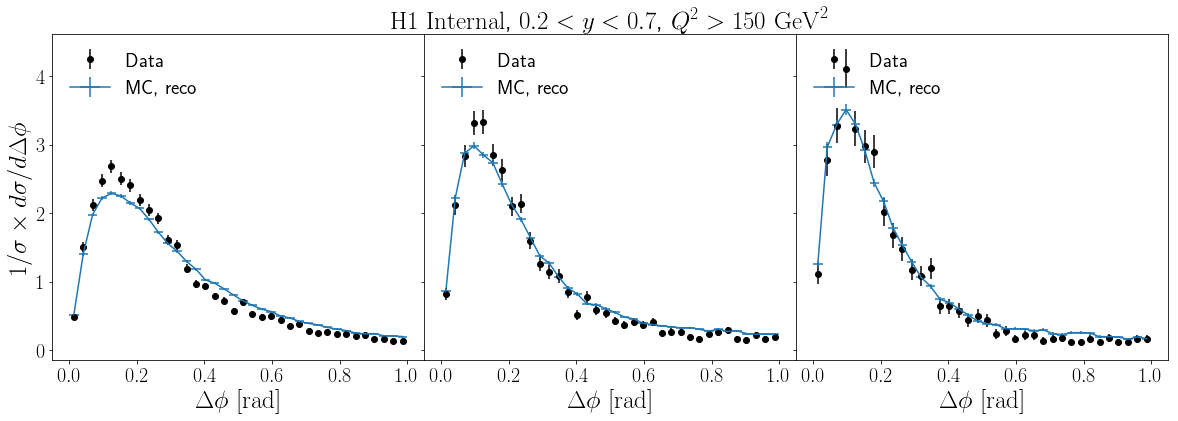

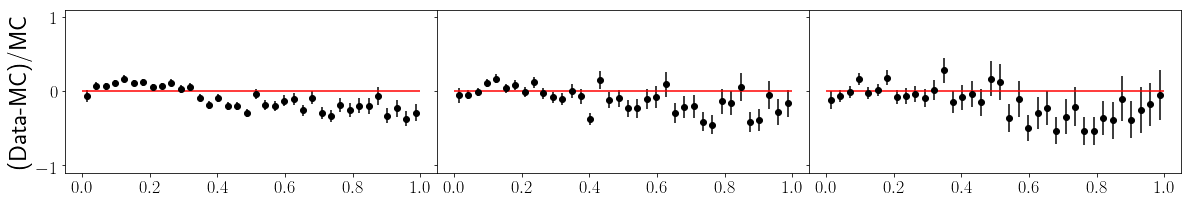

In [92]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})
fig2, axs2 = plt.subplots(1, 3,sharey=True, figsize=(20,3), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    cut = 'e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1])
    df_cut = df_jet.query(cut)
    #printSummary(df_cut)
    print '###########'
    
    ##Plot data
    Nelectrons = df.query(cut).shape[0]
    y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=nbins,range=(0.0,1.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    #Plot MC at the reconstructed level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    print Nelectrons
    #printSummary(df_cut)
    mcy, x  = np.histogram(mc_cut['jet_qtnormjetpt'],bins=nbins,range=(0.0,1.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    errmcy = np.sqrt(mcy)
    mcy = mcy/width
    errmcy = errmcy/width
    mcy = np.true_divide(mcy, Nelectrons)
    errmcy = np.true_divide(errmcy,Nelectrons)
    axs[counter].errorbar(x,mcy ,xerr=width/2.0,yerr=errmcy,  fmt='-',label='MC, reco')


    print 'y'
    print y 
    print 'mcy'
    print mcy
    ratio = np.divide(y-mcy, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    error_ratio = np.divide(erry, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    print ratio
    
    axs2[counter].errorbar(x,ratio,yerr=error_ratio,color='black',ls='none',fmt='o')
    axs2[counter].hlines(0.0, 0.0, 1.0,color='red')
    axs2[0].yaxis.set_label_text('(Data-MC)/MC ', fontsize=25)
    axs2[counter].yaxis.set_data_interval(-1.0,1.0)

    
    #Plot MC at the generated level
    #mc_cut = mc_jet.query(cut)
    #Nelectrons = mc.query(cut).shape[0]
    #print Nelectrons
    ##printSummary(df_cut)
    #y, x  = np.histogram(mc_cut['genjet_qtnormjetpt'],bins=nbins,range=(0.0,1.0))
    #width = (x[1:]-x[:-1])
    #x = (x[1:]+x[:-1])/2.0
    #erry = np.sqrt(y)
    #y = y/width
    #erry = erry/width
    #y = np.true_divide(y, Nelectrons)
    #erry = np.true_divide(erry,Nelectrons)
    #axs[counter].errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')

    

    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    #axs[counter].text(minimo,6.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

#np.divide(self.data- fitTotal , totalerror,  out=np.zeros_like(totalerror), where=totalerror!=0)

## qT distribution


###########
8688.0
17.196316  mean lepton pt
0.37080348  mean inelasticity
22.02386  mean jet p
17.292486  mean jet pT
count    119144.000000
mean         17.292486
std           4.739050
min          10.000024
25%          13.890727
50%          16.696234
75%          19.813633
max          49.501633
Name: jet_pt, dtype: float64
0.01386621  mean x
500.52182  mean Q2
count    119144.000000
mean        500.521820
std         147.788742
min         260.771851
25%         395.452263
50%         469.074783
75%         565.334625
max        1772.655151
Name: Q2, dtype: float64
17.196316  mean lepton pt
0.37080348  mean inelasticity
22.02386  mean jet p
17.292486  mean jet pT
count    119144.000000
mean         17.292486
std           4.739050
min          10.000024
25%          13.890727
50%          16.696234
75%          19.813633
max          49.501633
Name: jet_pt, dtype: float64
0.01386621  mean x
500.52182  mean Q2
count    119144.000000
mean        500.521820
std         147.788742
m

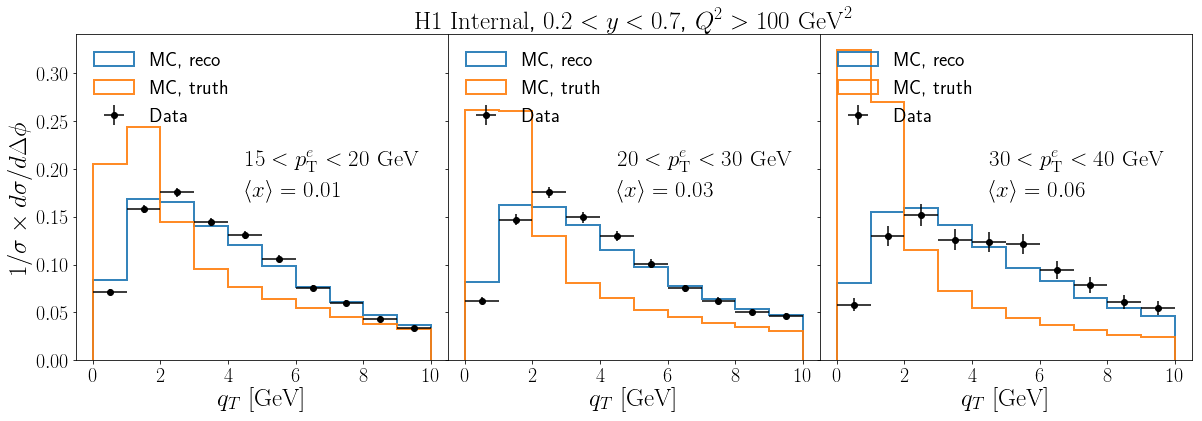

In [34]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,30),(30,40)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    #y = y/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=2)
    printSummary(df_cut)
    
    #plot mc
    df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=10,range=(0,10),normed=True,alpha=0.9, label='MC, truth',histtype='step',lw=2)
    printSummary(df_cut)
    
    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{T}$ $\mathrm{[GeV]}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')

    axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqt.png', bbox_inches='tight')
plt.savefig('H1_Leptonqt.pdf', bbox_inches='tight')

###########
9706.0
17.194744  mean lepton pt
0.36766717  mean inelasticity
22.880215  mean jet p
17.311972  mean jet pT
count    108751.000000
mean         17.311972
std           4.893677
min          10.001206
25%          13.712574
50%          16.632612
75%          19.970930
max          49.896599
Name: jet_pt, dtype: float64
0.013900331  mean x
497.6691  mean Q2
count    108751.000000
mean        497.669098
std         148.349152
min         259.698120
25%         391.327423
50%         465.776520
75%         562.976044
max        1773.697998
Name: Q2, dtype: float64
###########
5928.0
23.856045  mean lepton pt
0.35654116  mean inelasticity
31.117437  mean jet p
22.43515  mean jet pT
count    75234.000000
mean        22.435150
std          6.542867
min         10.000598
25%         17.904923
50%         22.369875
75%         26.639059
max         49.978210
Name: jet_pt, dtype: float64
0.027260682  mean x
946.49725  mean Q2
count    75234.000000
mean       946.497253
std        32

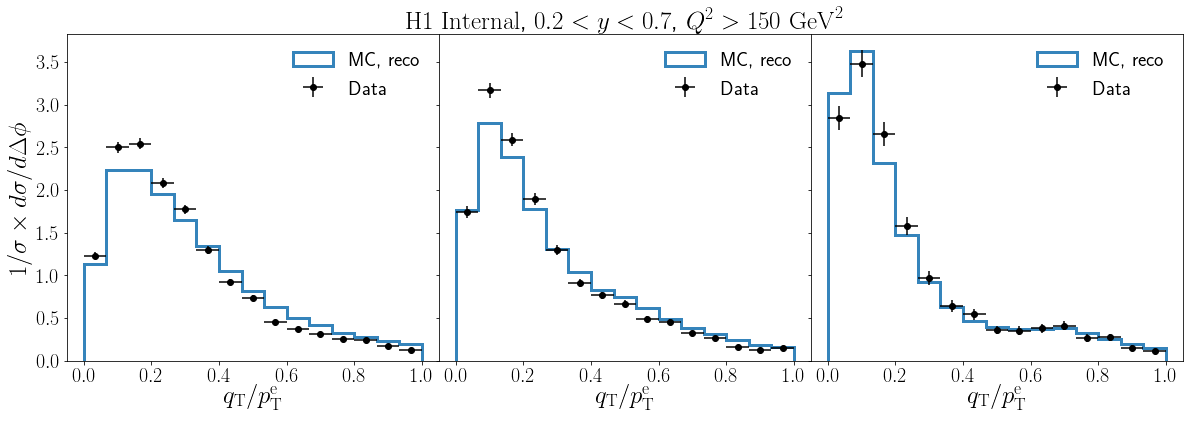

In [35]:


from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

maxrange = 1.0
nbins = 15
for counter,edges in enumerate([(15,20), (20,30),(30,50)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=3)
    printSummary(df_cut)
    

    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='best')

    #axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
     #                 r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqtnormed_ept.png', bbox_inches='tight')
plt.savefig('H1_Leptonqtnormed_ept.pdf', bbox_inches='tight')

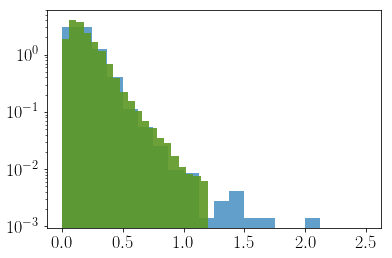

In [36]:
df_cut = df_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,2.5),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)
plt.yscale('log')

## Polarization stuff

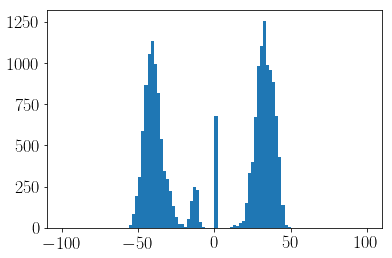

In [37]:
plt.hist(df['polarization'],range=(-100,100),bins=100)

plt.show()

(array([0.28498366, 0.19728905, 0.19729638, 0.15345274, 0.17536804,
        0.26306184, 0.19729638, 0.17536804, 0.28498366, 0.35074912,
        0.37265709, 0.3288273 , 0.32881508, 0.19729638, 0.37267094,
        0.15344704, 0.41651458, 0.28498366, 0.32881508, 0.3288273 ,
        0.46035822, 0.35073609, 0.46035822, 0.28498366, 0.30689407,
        0.19729638, 0.37267094, 0.46034111, 0.39459276, 0.46035822,
        0.4164991 , 0.4384364 , 0.52612368, 0.48226212, 0.50420186,
        0.56996732, 0.3945781 , 0.63573278, 0.37265709, 0.61381096,
        0.52612368, 0.61378815, 0.39459276, 0.59188914, 0.63570915,
        0.6576546 , 0.52612368, 0.54802513, 0.5480455 , 0.72342006,
        0.78915619, 0.85495098, 0.78918552, 0.59186714, 0.5480455 ,
        1.05224736, 0.92068222, 0.83302916, 1.07416918, 0.76723519,
        0.96456008, 1.16185646, 0.8329982 , 1.27146556, 1.2275763 ,
        1.33723102, 1.2057001 , 1.31526032, 1.03032554, 1.66605831,
        1.27141831, 1.68798013, 1.68798013, 1.73

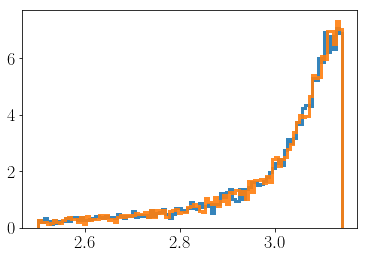

In [38]:
plt.hist(df_jet.query('polarization>20')['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(df_jet.query('polarization<-20')['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
